Seasonal data has predictable patterns.

seasonal data = trend + seasonal component + residual.

To know if a dataset is seasonal or not, we use the ACF plot of the dataset to check if it has a period.

To decompose data we need to know its cycle/periods. We use the ACF plot to obtain the period. First we must detrend the time series if it is not stationary.

To detrend:
df = df - df.rolling(N).mean()     where N is any big number
df = df.dropna()




In [1]:
# import packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import seed
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
milk_production = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/milk_production.csv', parse_dates=['date'], index_col='date')
milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


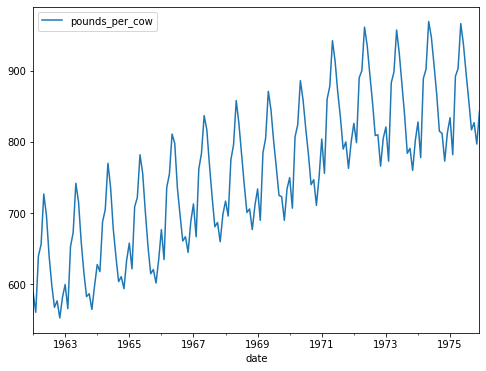

In [3]:
# Plot the milk production dataset
milk_production.plot(figsize=(8,6))
plt.show();

In [4]:
# Perform the Dickey-Fuller on the data
adfuller(milk_production)

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

It is a random walk

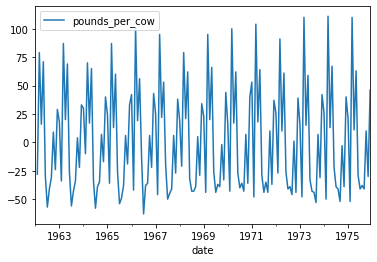

In [5]:
# Obtain the difference 
milk_production.diff().plot()
plt.show();

Seasonality is found

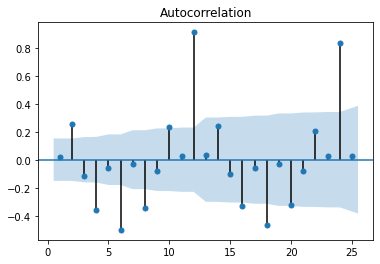

In [6]:
# Plot the ACF of milk production to obtain the period.
plot_acf(milk_production.diff().dropna(), lags=25, zero=False)

# Show figure
plt.show()

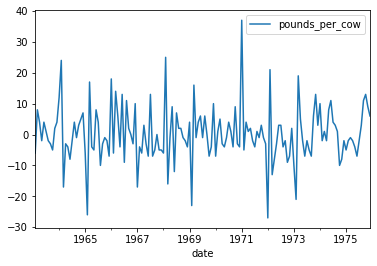

In [7]:
milk_production.diff().dropna().diff(12).dropna().plot()
plt.show();

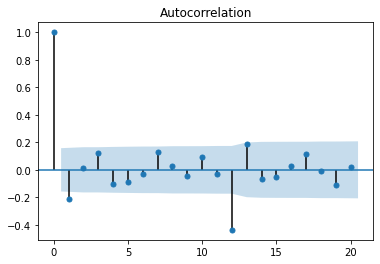

In [8]:
plot_acf(milk_production.diff().dropna().diff(12).dropna(), lags=20)
plt.show();

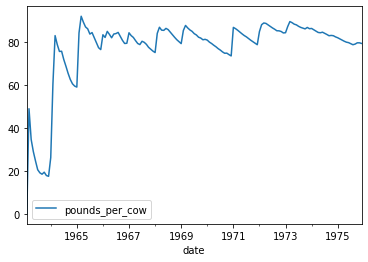

In [9]:
milk_production.diff().dropna().diff(12).dropna().expanding(1).var(ddof=0).plot()
plt.show();

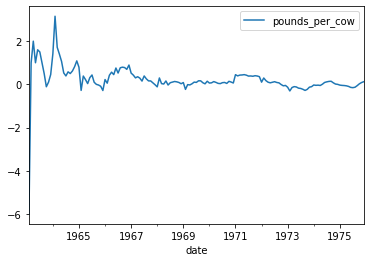

In [10]:
milk_production.diff().dropna().diff(12).dropna().expanding(1).mean().plot()
plt.show();

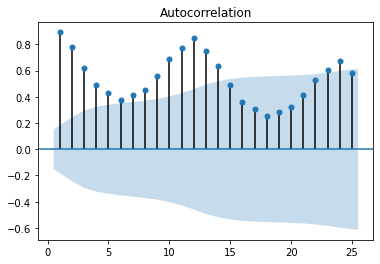

In [11]:
# Plot the ACF of milk production to obtain the period.
plot_acf(milk_production['pounds_per_cow'], lags=25, zero=False)

# Show figure
plt.show()

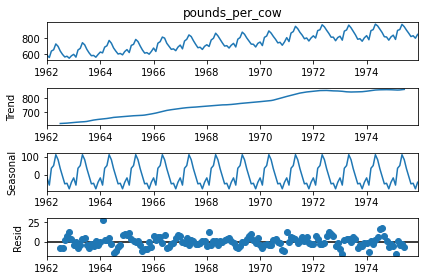

In [12]:
# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [13]:
# Import dataset and set date to index
candy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/candy_production.csv', parse_dates=['date'], index_col='date')
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


In [14]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1972-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IPG3113N  564 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


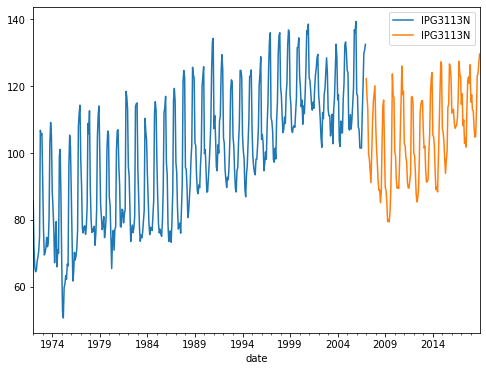

In [15]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006',]
candy_test = candy.loc['2007':,]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax, figsize=(8, 6))
candy_test.plot(ax=ax, figsize=(8, 6))
plt.show();

In [16]:
# Perform Dickey-Fuller's test on the candy data
adfuller(candy)

(-1.7760153075016094,
 0.39243275007140066,
 14,
 549,
 {'1%': -3.4423174665535385,
  '5%': -2.866818952732754,
  '10%': -2.569581505602171},
 3094.828881317046)

The data is a random walk

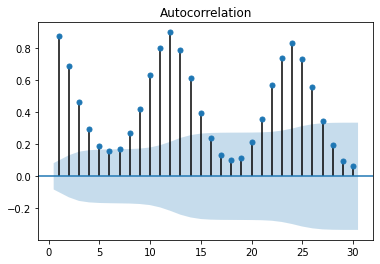

In [17]:
# Plot the ACF of the candy production to check for seasonality
plot_acf(candy, lags=30, zero=False)

# Show figure
plt.show()

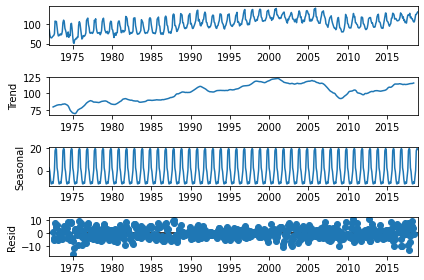

In [18]:
# Perform additive decomposition
decomp = seasonal_decompose(candy, period=12)

# Plot decomposition
decomp.plot()
plt.show()

A SARIMA Model is a model used to describe seasonal time series data. Such models have a seasonal and a non-seasonal autoregressive part. The non-seasonal autoregressive part has order parameters p,d,q, while the seasonal autorgressive part has the parameters P,D,Q,S where S is the seasonal period step and other parameters are the seasonal equivalent of the non-seasonal parameters.

In [19]:
# Import dataset and set date to index
water = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/water.txt', engine='python', sep=' ', parse_dates=['date'], index_col='date')
water.dropna(axis=1, inplace=True)
water.columns = ['water_consumers']
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


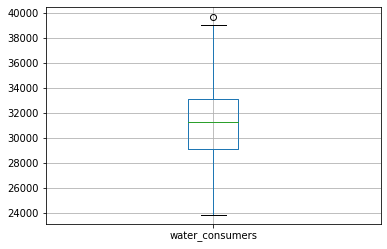

In [20]:
# Create a plot
water.boxplot()
plt.show();

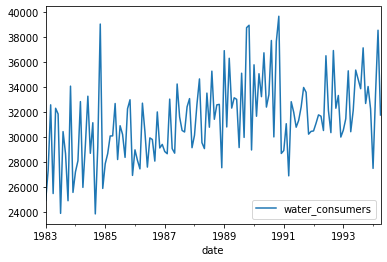

In [21]:
water.plot()
plt.show();

In [22]:
# Perform Dickey-Fuller test
adfuller(water)

(-1.334673861894635,
 0.6131635216111303,
 11,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 2270.6336183231397)

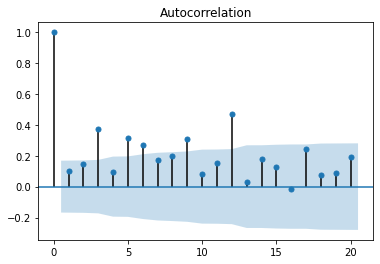

In [23]:
plot_acf(water, lags=20)
plt.show();

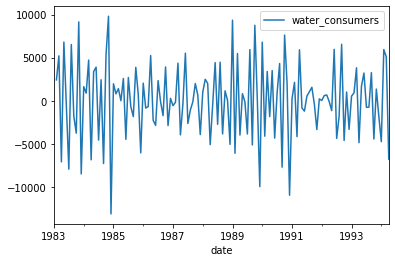

In [24]:
water.diff().plot()
plt.show();

In [25]:
adfuller(water.diff().dropna())

(-7.329426914095865,
 1.138134848009068e-10,
 10,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 2251.229010451765)

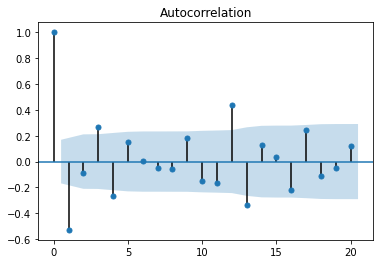

In [26]:
plot_acf(water.diff().dropna(), lags=20)
plt.show();

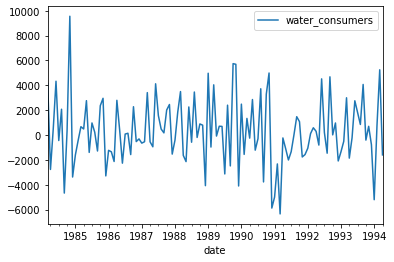

In [27]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

water_2.plot()
plt.show();

In [28]:
adfuller(water_2)

(-2.032044143493235,
 0.2727019555906801,
 11,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 1995.118100360575)

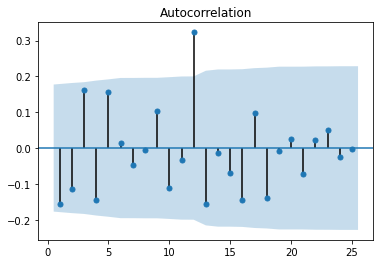

In [29]:
# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2, lags=25, zero=False, ax=ax1)

# Show figure
plt.show()